#Informacion de los integrantes del equipo 
 
 Emiliano Cavazos Rodriguez 1967273 IMTC 

 Jorge Armando Segura Hernández 1968532 IMTC 

 José Ángel Moreno Santiago 2077999 IMTC 

In [ ]:
#Importamos las bibliotecas necesarias.

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
#Descargamos y normalizamos el conjunto de datos que vamos a utilizar (Fashion MNIST)
(imagenes_entrenamiento, etiquetas_entrenamiento), (imagenes_prueba, etiquetas_prueba) = datasets.fashion_mnist.load_data()

# Normalizamos los valores de píxeles para que estén entre 0 y 1
imagenes_entrenamiento, imagenes_prueba = imagenes_entrenamiento / 255.0, imagenes_prueba / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#Definimos las etiquetas de clase
nombres_clases = ['Camiseta/Top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
                  'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota de tobillo']

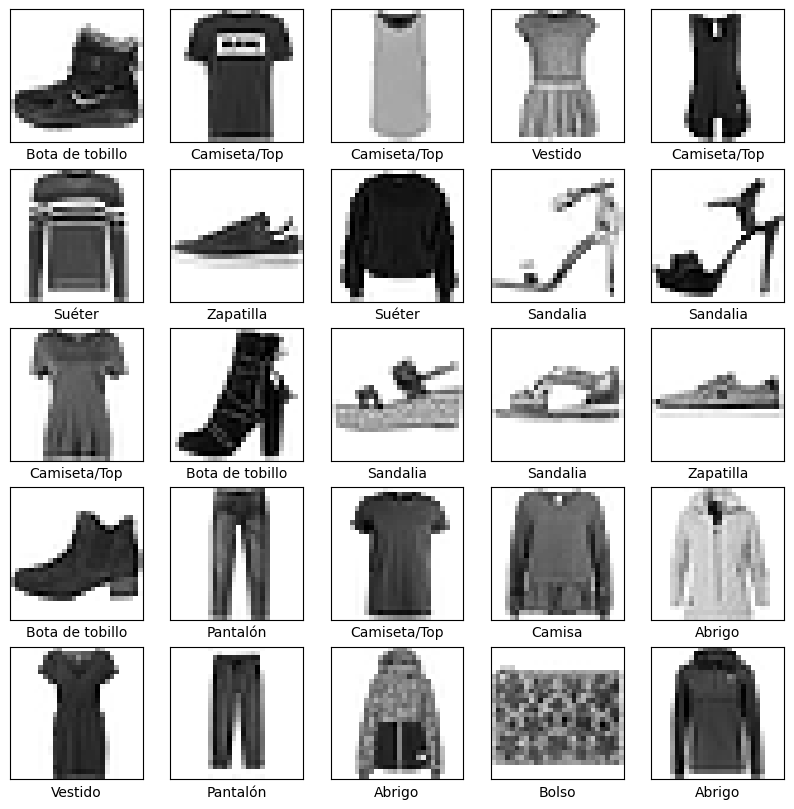

In [ ]:
#Visualizamos algunas imágenes del conjunto de entrenamiento
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagenes_entrenamiento[i], cmap=plt.cm.binary)
    plt.xlabel(nombres_clases[etiquetas_entrenamiento[i]])
plt.show()


In [ ]:
#Creamos la base convolucional
modelo = models.Sequential()
modelo.add(layers.Flatten(input_shape=(28, 28)))
modelo.add(layers.Dense(128, activation='relu'))
modelo.add(layers.Dense(10))

modelo.summary()

#Compilamos y entrenamos el modelo
modelo.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

historia = modelo.fit(imagenes_entrenamiento, etiquetas_entrenamiento, epochs=10, 
                      validation_data=(imagenes_prueba, etiquetas_prueba))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4959 - accuracy: 0.8246 - val_loss: 0.4398 - val_accuracy: 0.8408
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3776 - accuracy: 0.8647 - val_loss: 0.4255 - val_accuracy: 0.8429
Epoch 3/10
1875/1875 [==

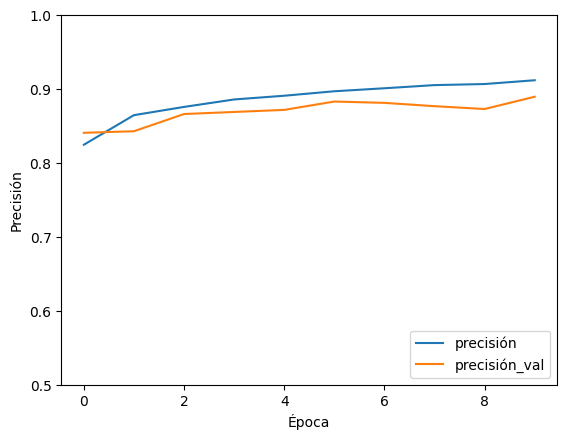

In [ ]:
#Graficamos la precisión del modelo durante el entrenamiento
plt.plot(historia.history['accuracy'], label='precisión')
plt.plot(historia.history['val_accuracy'], label='precisión_val')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
#Evaluamos el modelo en el conjunto de prueba
pérdida_prueba, precisión_prueba = modelo.evaluate(imagenes_prueba, etiquetas_prueba, verbose=2)
print(precisión_prueba)

313/313 - 1s - loss: 0.3289 - accuracy: 0.8896 - 697ms/epoch - 2ms/step
0.8895999789237976
